In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df['Unnamed: 2'].value_counts().head()

 bt not his girlfrnd... G o o d n i g h t . . .@"       3
 PO Box 5249                                            2
this wont even start........ Datz confidence.."         2
GN                                                      2
 don't miss ur best life for anything... Gud nyt..."    2
Name: Unnamed: 2, dtype: int64

In [5]:
df=df.iloc[:,0:2]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [9]:
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [10]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(inplace=True)

### Explorarory Data Analysis

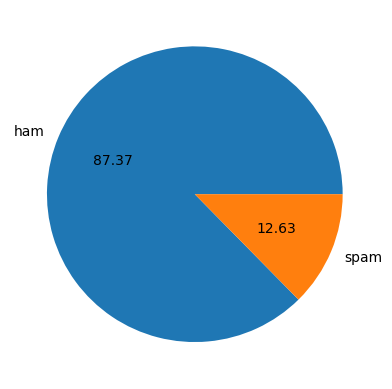

In [13]:
plt.pie (df.target.value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Bhuvnesh's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
df['char_count']=df.text.apply(len)

In [16]:
df['word_count']=df.text.apply(lambda x: len(nltk.word_tokenize(x)))

In [17]:
df.sort_values('word_count').head(20)

,target,text,char_count,word_count
5268,0,\ER,3,1
4291,0,G.W.R,5,1
1924,0,Ok,2,1
1611,0,645,3,1
3092,0,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323,49,1
260,0,Yup,3,1
2906,0,ALRITE,6,1
2601,0,Okie,4,1
959,0,Where @,7,2
3463,0,My phone,8,2


In [18]:
df['sent_count']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [19]:
df

,target,text,char_count,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [20]:
df.describe()

,target,char_count,word_count,sent_count
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [21]:
df[df['target']==0].describe()

,target,char_count,word_count,sent_count
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [22]:
df[df['target']==1].describe()

,target,char_count,word_count,sent_count
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


###  We can see that the mean no. of words, characters and sentences is higher in the spam messages

In [23]:
def eda(attribute):
    plt.figure(figsize=(10,4))
    sns.histplot(df[df['target']==0][f'{attribute}_count'],label='Spam')
    sns.histplot(df[df['target']==1][f'{attribute}_count'],label='Ham')
    plt.legend()
    plt.show()

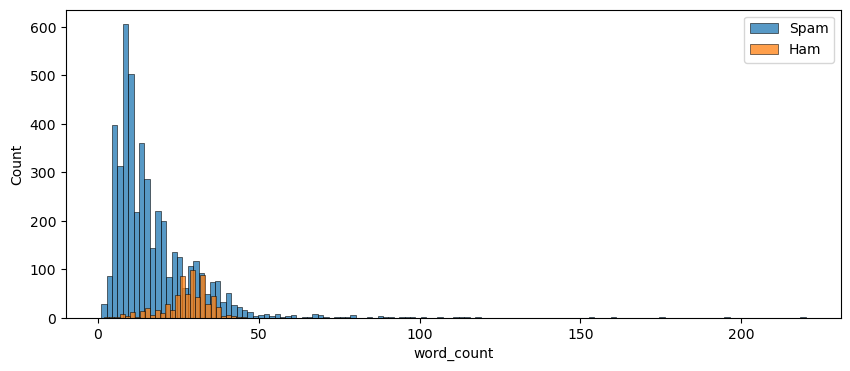

In [24]:
eda('word')

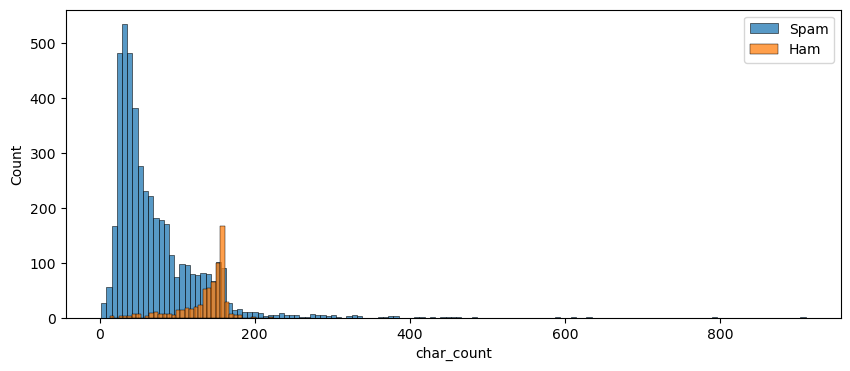

In [25]:
eda('char')

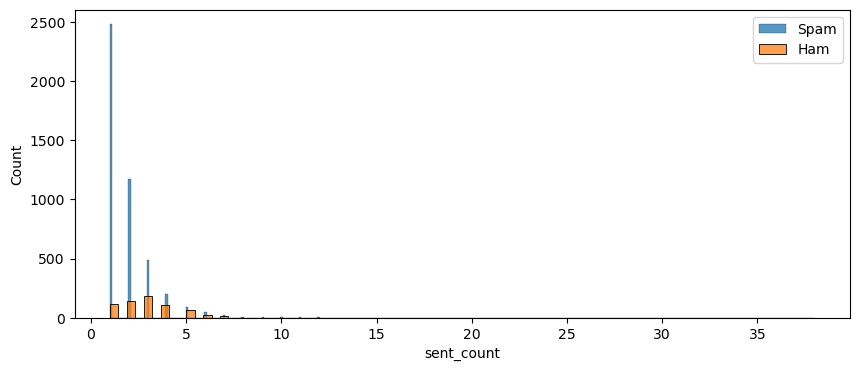

In [26]:
eda('sent')

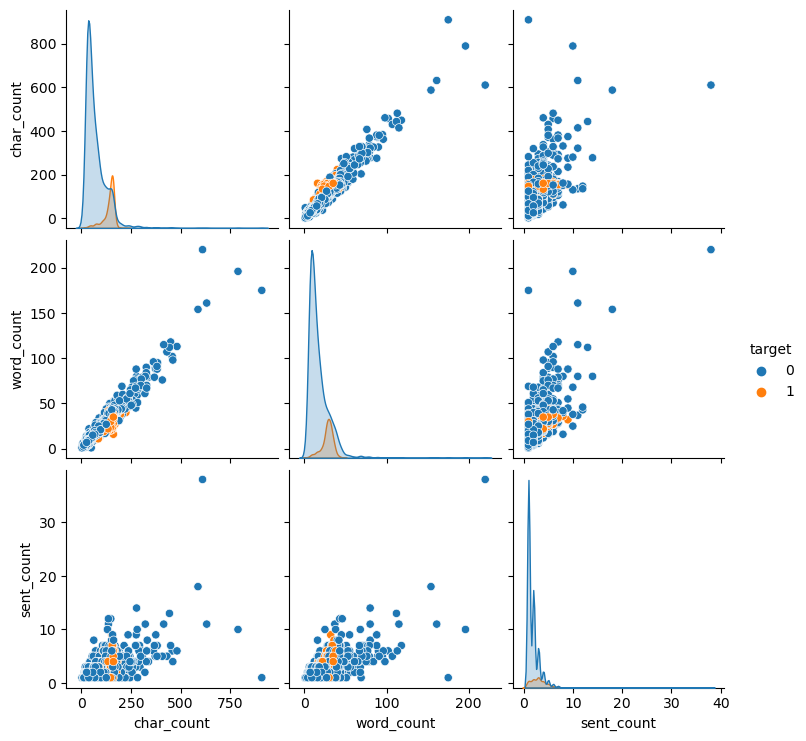

In [27]:
sns.pairplot(df,hue='target')

C:\Users\Bhuvnesh's PC\AppData\Local\Temp\ipykernel_4512\2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


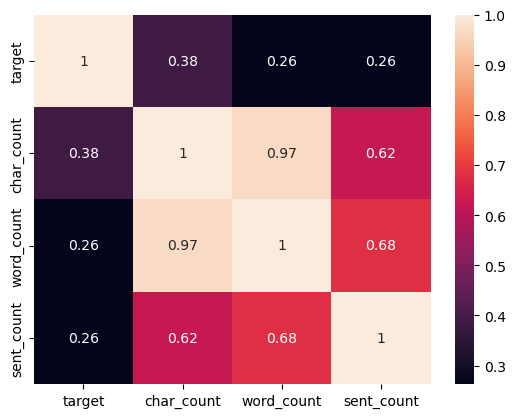

In [28]:
sns.heatmap(df.corr(),annot=True)
plt.show()

###  We can see that there is multicollinearity in the data 

## Text Preprocessing
1. Lower case
2. Tokenize
3. Remove special characers
4. Remove stop words and punctuation
5. Stemming

In [29]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [30]:
from nltk.corpus import stopwords
st_words = stopwords.words('english')

In [31]:
def transform_text(text):
    x=text.lower()
    x=nltk.word_tokenize(x)
    text=[]
    for i in x:
        if i.isalnum() and i not in st_words:
            text.append(ps.stem(i))
    return ' '.join(text)

In [32]:
df['transformed_text']=df['text'].apply(transform_text)

In [33]:
df

,target,text,char_count,word_count,sent_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


## Making Word-Cloud



In [34]:
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=600)

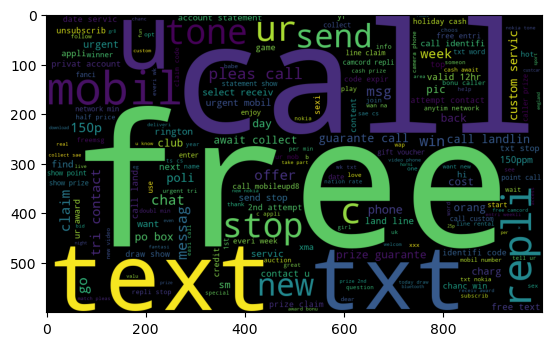

In [35]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)
plt.show()

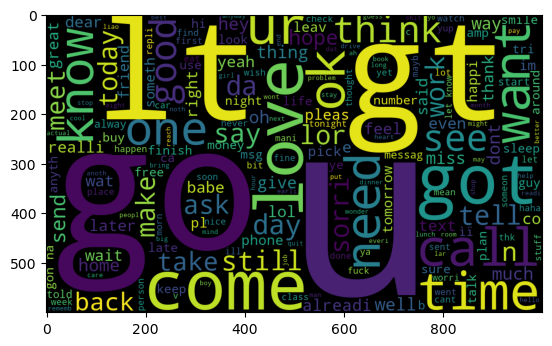

In [36]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)
plt.show()

In [37]:
spam_t30=df[df['target']==0]['transformed_text'].str.cat().split(' ')
spam_t30=Counter(spam_t30).most_common(30)
spam_t30

[('u', 717),
 ('go', 354),
 ('get', 295),
 ('lt', 271),
 ('2', 270),
 ('gt', 242),
 ('come', 205),
 ('like', 196),
 ('got', 186),
 ('ur', 185),
 ('time', 175),
 ('know', 173),
 ('want', 169),
 ('call', 168),
 ('love', 166),
 ('4', 150),
 ('good', 146),
 ('need', 143),
 ('day', 139),
 ('one', 133),
 ('take', 120),
 ('n', 118),
 ('make', 116),
 ('still', 116),
 ('see', 116),
 ('lor', 110),
 ('home', 109),
 ('say', 105),
 ('tell', 103),
 ('hope', 102)]

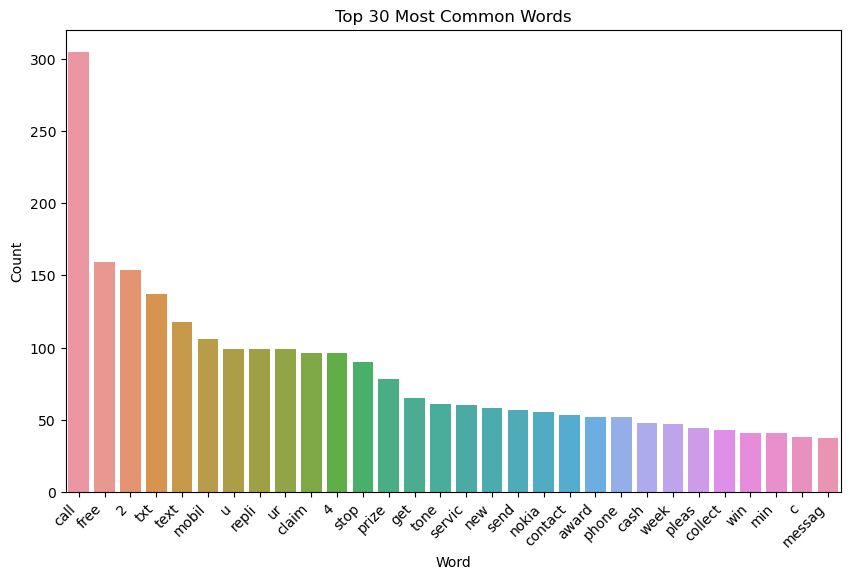

In [38]:
ham_t30 = df[df['target'] == 1]['transformed_text'].str.cat().split(' ')
ham_t30 = pd.DataFrame(Counter(ham_t30).most_common(30), columns=['Word', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=ham_t30)
plt.title('Top 30 Most Common Words')
plt.xticks(rotation=45, ha='right') 
plt.show()


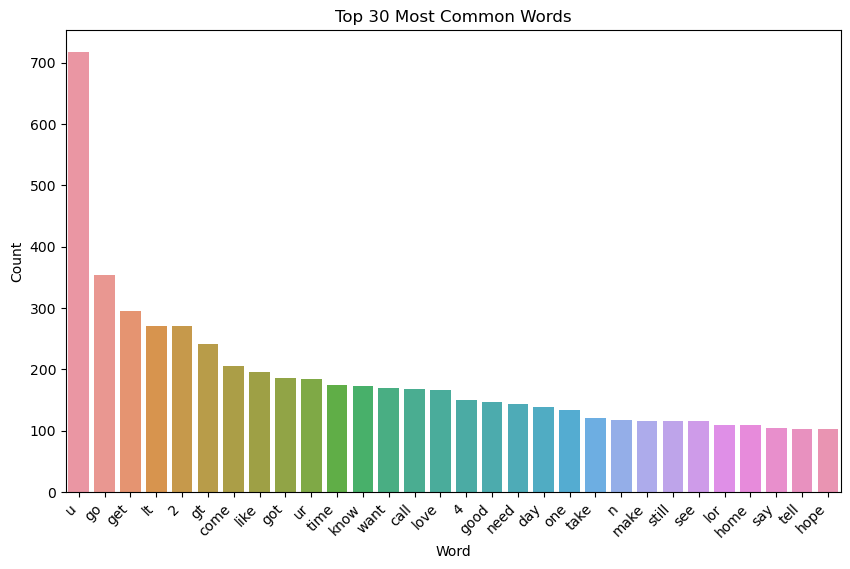

In [39]:
spam_t30 = df[df['target'] == 0]['transformed_text'].str.cat().split(' ')
spam_t30 = pd.DataFrame(Counter(spam_t30).most_common(30), columns=['Word', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=spam_t30)
plt.title('Top 30 Most Common Words')
plt.xticks(rotation=45, ha='right') 
plt.show()


## Model Building

In [95]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

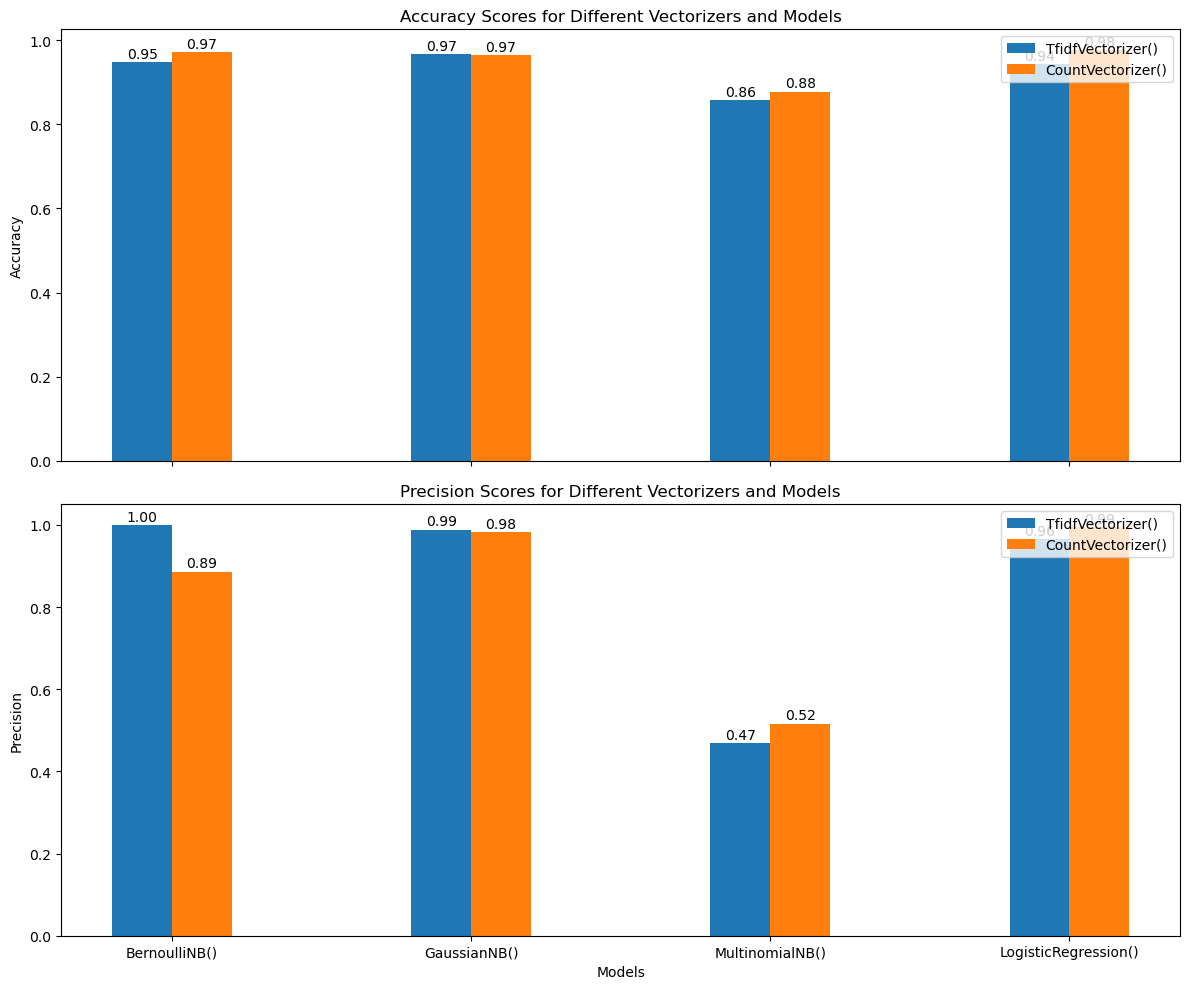

In [49]:
def anal_plot(data, models, vectorizers):
    results = []

    for vect in vectorizers:
        cv = vect
        x = cv.fit_transform(data['transformed_text']).toarray()
        y = data['target']
        xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.35)

        for model in models:
            model.fit(xtr, ytr)
            ypr = model.predict(xte)
            accuracy = accuracy_score(yte, ypr)
            precision = precision_score(yte, ypr)
            results.append((vect, model, accuracy, precision))

    plot_results(results)

def plot_results(results):
    vectorizers = list(set([vect for vect, _, _, _ in results]))
    models = list(set([model for _, model, _, _ in results]))

    fig, axs = plt.subplots(2, figsize=(12, 10), sharex=True)
    bar_width = 0.2
    bar_positions = np.arange(len(models))

    for i, metric in enumerate(['Accuracy', 'Precision']):
        axs[i].set_title(f'{metric} Scores for Different Vectorizers and Models')
        axs[i].set_ylabel(metric)

        for j, vect in enumerate(vectorizers):
            scores = [score for v, m, acc, pre in results if v == vect for score in [acc, pre]]
            axs[i].bar(bar_positions + j * bar_width, scores[i::2], width=bar_width, label=f'{vect}')

            for k, score in enumerate(scores[i::2]):
                axs[i].text(bar_positions[k] + j * bar_width, score + 0.01, f'{score:.2f}', ha='center')

    axs[1].set_xticks(bar_positions + ((len(vectorizers) - 1) / 2) * bar_width)
    axs[1].set_xticklabels(models)
    axs[1].set_xlabel('Models')

    axs[0].legend(loc='upper right')
    axs[1].legend(loc='upper right')

    plt.tight_layout()
    plt.show()

models = [MultinomialNB(), BernoulliNB(), GaussianNB(), LogisticRegression()]
vectorizers = [TfidfVectorizer(), CountVectorizer()]
anal(df, models, vectorizers)


In [69]:
def anal(data, models, vectorizers):
    results = []
    for vect in vectorizers:
        cv = vect
        x = cv.fit_transform(data['transformed_text']).toarray()
        y = data['target']
        xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.35)

        for model in models:
            model.fit(xtr, ytr)
            ypr = model.predict(xte)
            accuracy = accuracy_score(yte, ypr)
            prec=precision_score(yte,ypr)
            results.append((vect,model,accuracy,prec))

    return pd.DataFrame(results,columns=['Vectorizer','Model','Accuracy','Precision'])



In [112]:
models = [MultinomialNB(), BernoulliNB(), GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),SVC(),RandomForestClassifier(),BaggingClassifier(),ExtraTreesClassifier(),GradientBoostingClassifier()]
vectorizers = [TfidfVectorizer(max_features=3000), CountVectorizer(max_features=3000)]
results1=anal(df, models,vectorizers)

Variable not found.


In [93]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [94]:
models2=[svc,knc,mnb,dtc,lrc,rfc,abc,bc,etc,gbc]

results2=anal(data,models2,vectorizers)

In [102]:
cv = TfidfVectorizer(max_features=3000)
x = cv.fit_transform(df['transformed_text']).toarray()
y = df['target']
xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.35)

In [106]:
vc=VotingClassifier(estimators=[('svm',SVC(kernel='sigmoid', gamma=1.0,probability=True)), ('nb', mnb), ('et', etc)],voting='soft')
result3=anal(df,[vc],vectorizers)

In [115]:
anal(df,[mnb,BernoulliNB(),svc],vectorizers)

,Vectorizer,Model,Accuracy,Precision
0,TfidfVectorizer(max_features=3000),MultinomialNB(),0.969061,0.988024
1,TfidfVectorizer(max_features=3000),BernoulliNB(),0.975138,0.988764
2,TfidfVectorizer(max_features=3000),"SVC(gamma=1.0, kernel='sigmoid')",0.972376,0.966851
3,CountVectorizer(max_features=3000),MultinomialNB(),0.972928,0.899582
4,CountVectorizer(max_features=3000),BernoulliNB(),0.970166,0.979381
5,CountVectorizer(max_features=3000),"SVC(gamma=1.0, kernel='sigmoid')",0.928729,0.770732


In [116]:
mnb.fit(xtr,ytr)

MultinomialNB()

In [122]:
vect=TfidfVectorizer(max_features=3000)
vect.fit_transform(df['transformed_text']).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
result3

,Vectorizer,Model,Accuracy,Precision
0,TfidfVectorizer(max_features=4000),"VotingClassifier(estimators=[('svm',\n ...",0.981768,0.99000
1,CountVectorizer(max_features=3000),"VotingClassifier(estimators=[('svm',\n ...",0.981768,0.99061


In [123]:
import pickle as pkl
pkl.dump(vect,open('vectorizer.pkl','wb'))
pkl.dump(mnb,open('model','wb'))
